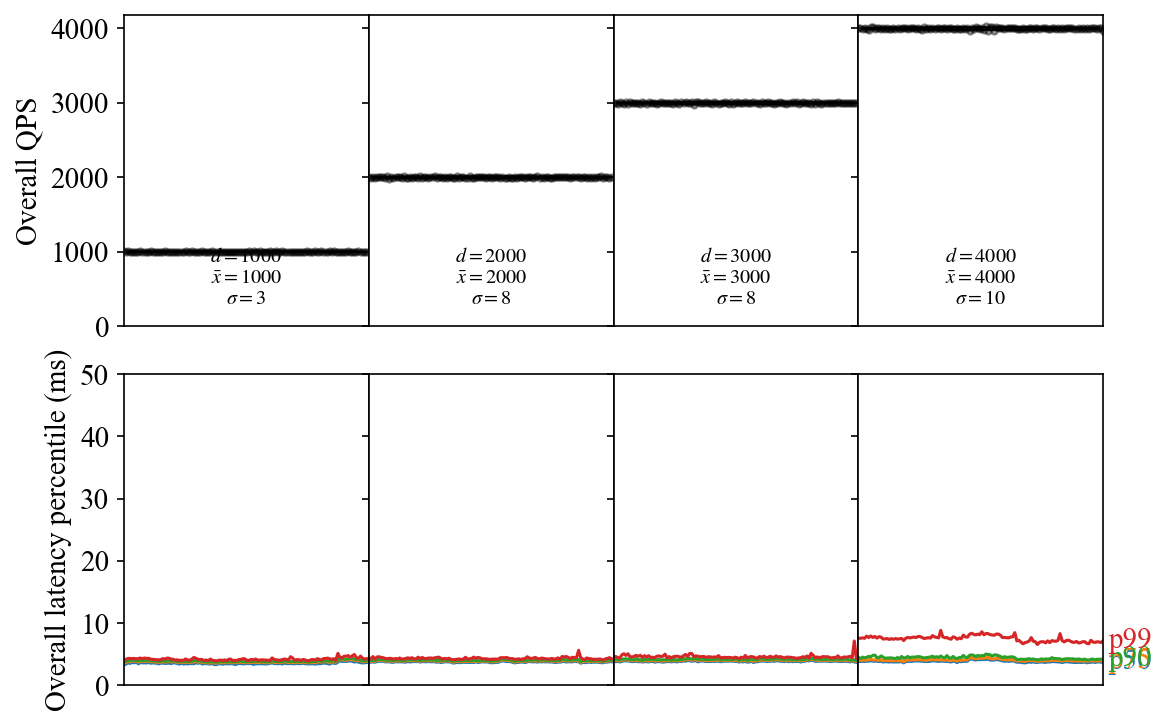

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 5)
matplotlib.rcParams['figure.dpi'] = 150

from mybench_analysis.database import Database
db = Database("data.sqlite")
_ = db.standard_figure(latency_ylim=(0, 50))

In [2]:
from mybench_analysis.database import Database

db = Database("data.sqlite")
run = db.run_data("T2022_11_09T17_38_36Z")

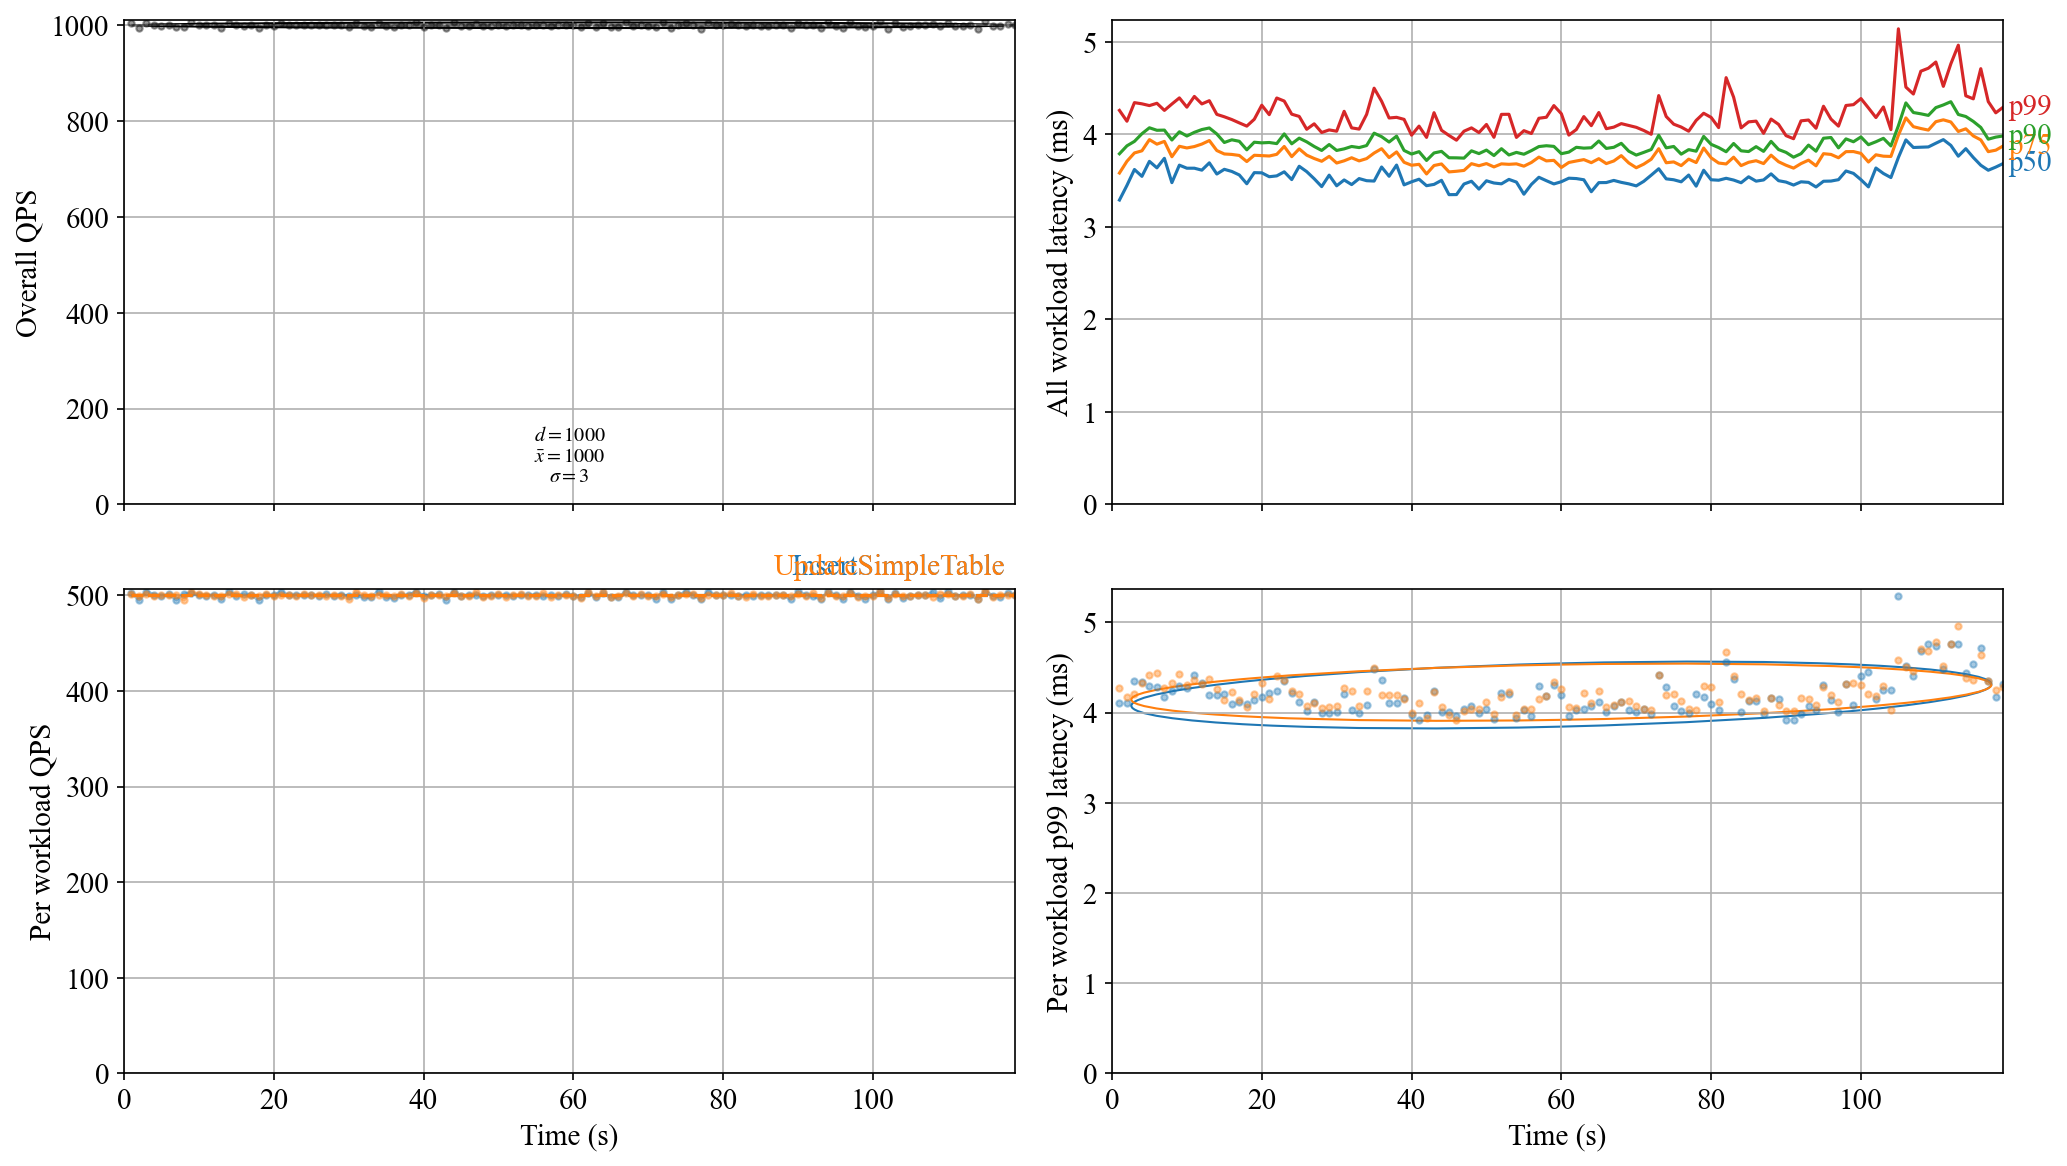

In [3]:
_ = run.standard_figure()

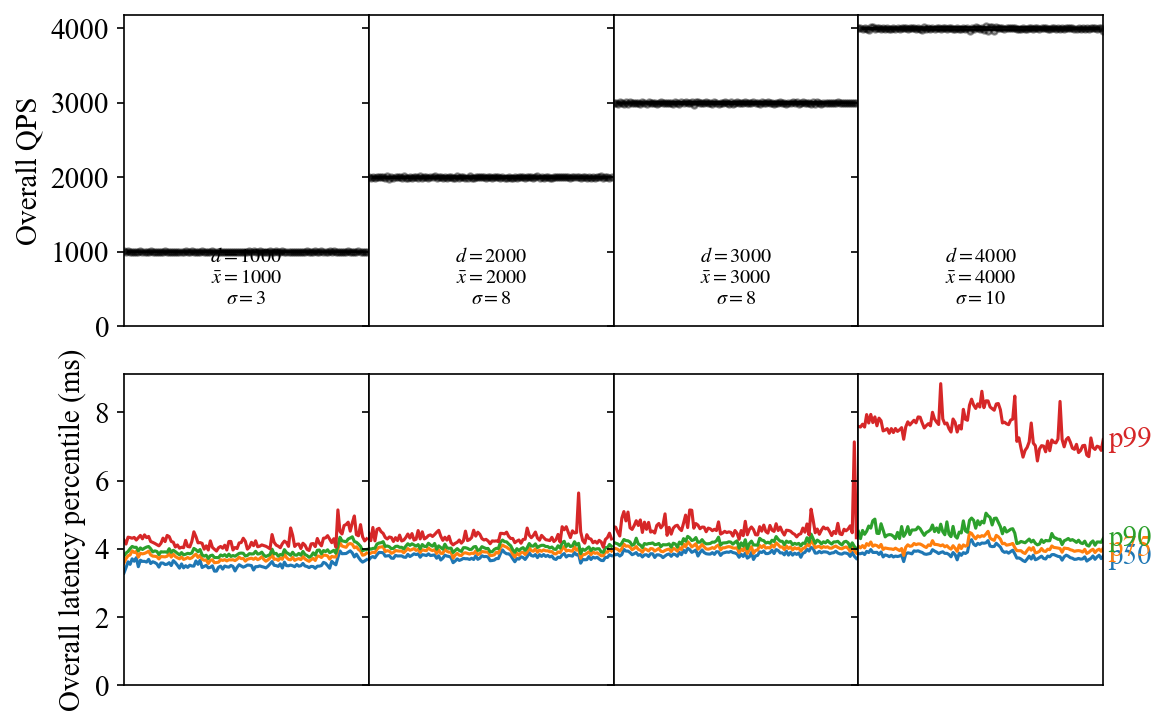

In [4]:
_ = db.standard_figure()

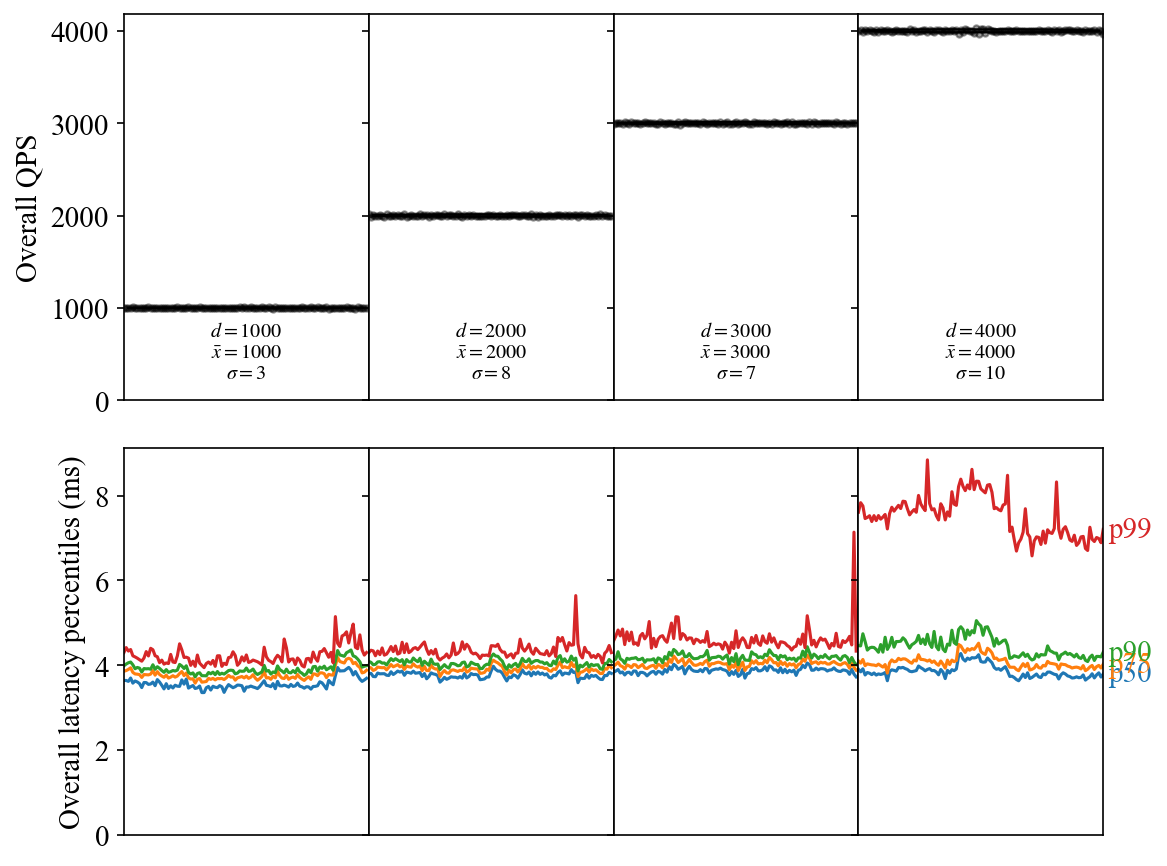

In [5]:
runs = {}

for run_meta in db.runs_meta:
  runs[run_meta["table_name"]] = db.run_data(run_meta["table_name"], remove_data_from_beginning=10)

qps_sorted_runs = sorted(runs.values(), key=lambda run: run.load_driver_data_for("__all__")["desired_rate"].iat[0])
runs_list = qps_sorted_runs

fig = plt.figure(figsize=[8, 6])
gs = fig.add_gridspec(ncols=1, nrows=2)

xlim = (10, 120)

# QPS
inner_gs = gs[0, 0].subgridspec(nrows=1, ncols=len(runs_list), wspace=0)
axs = inner_gs.subplots(sharey=True, squeeze=False)[0]

for i, ax in enumerate(axs):
  run = runs_list[i]
  run.plot_overall_qps(ax, ylim=False)
    
  ax.set_xlim(xlim)
  ax.set_xticks([]) # Disable ticks

ax.set_ylim(0, ax.get_ylim()[1])
axs[0].set_ylabel("Overall QPS")

# Overall latency
inner_gs = gs[1, 0].subgridspec(nrows=1, ncols=len(runs_list), wspace=0)
axs = inner_gs.subplots(sharey=True, squeeze=False)[0]

for i, ax in enumerate(axs):
  run = runs_list[i]
  run.plot_overall_all_percentile_latency(ax, ylim=False)
  
  ax.set_xlim(xlim)
  ax.set_xticks([]) # Disable ticks

ax.set_ylim(0, ax.get_ylim()[1])
axs[0].set_ylabel("Overall latency percentiles (ms)")

fig.tight_layout()

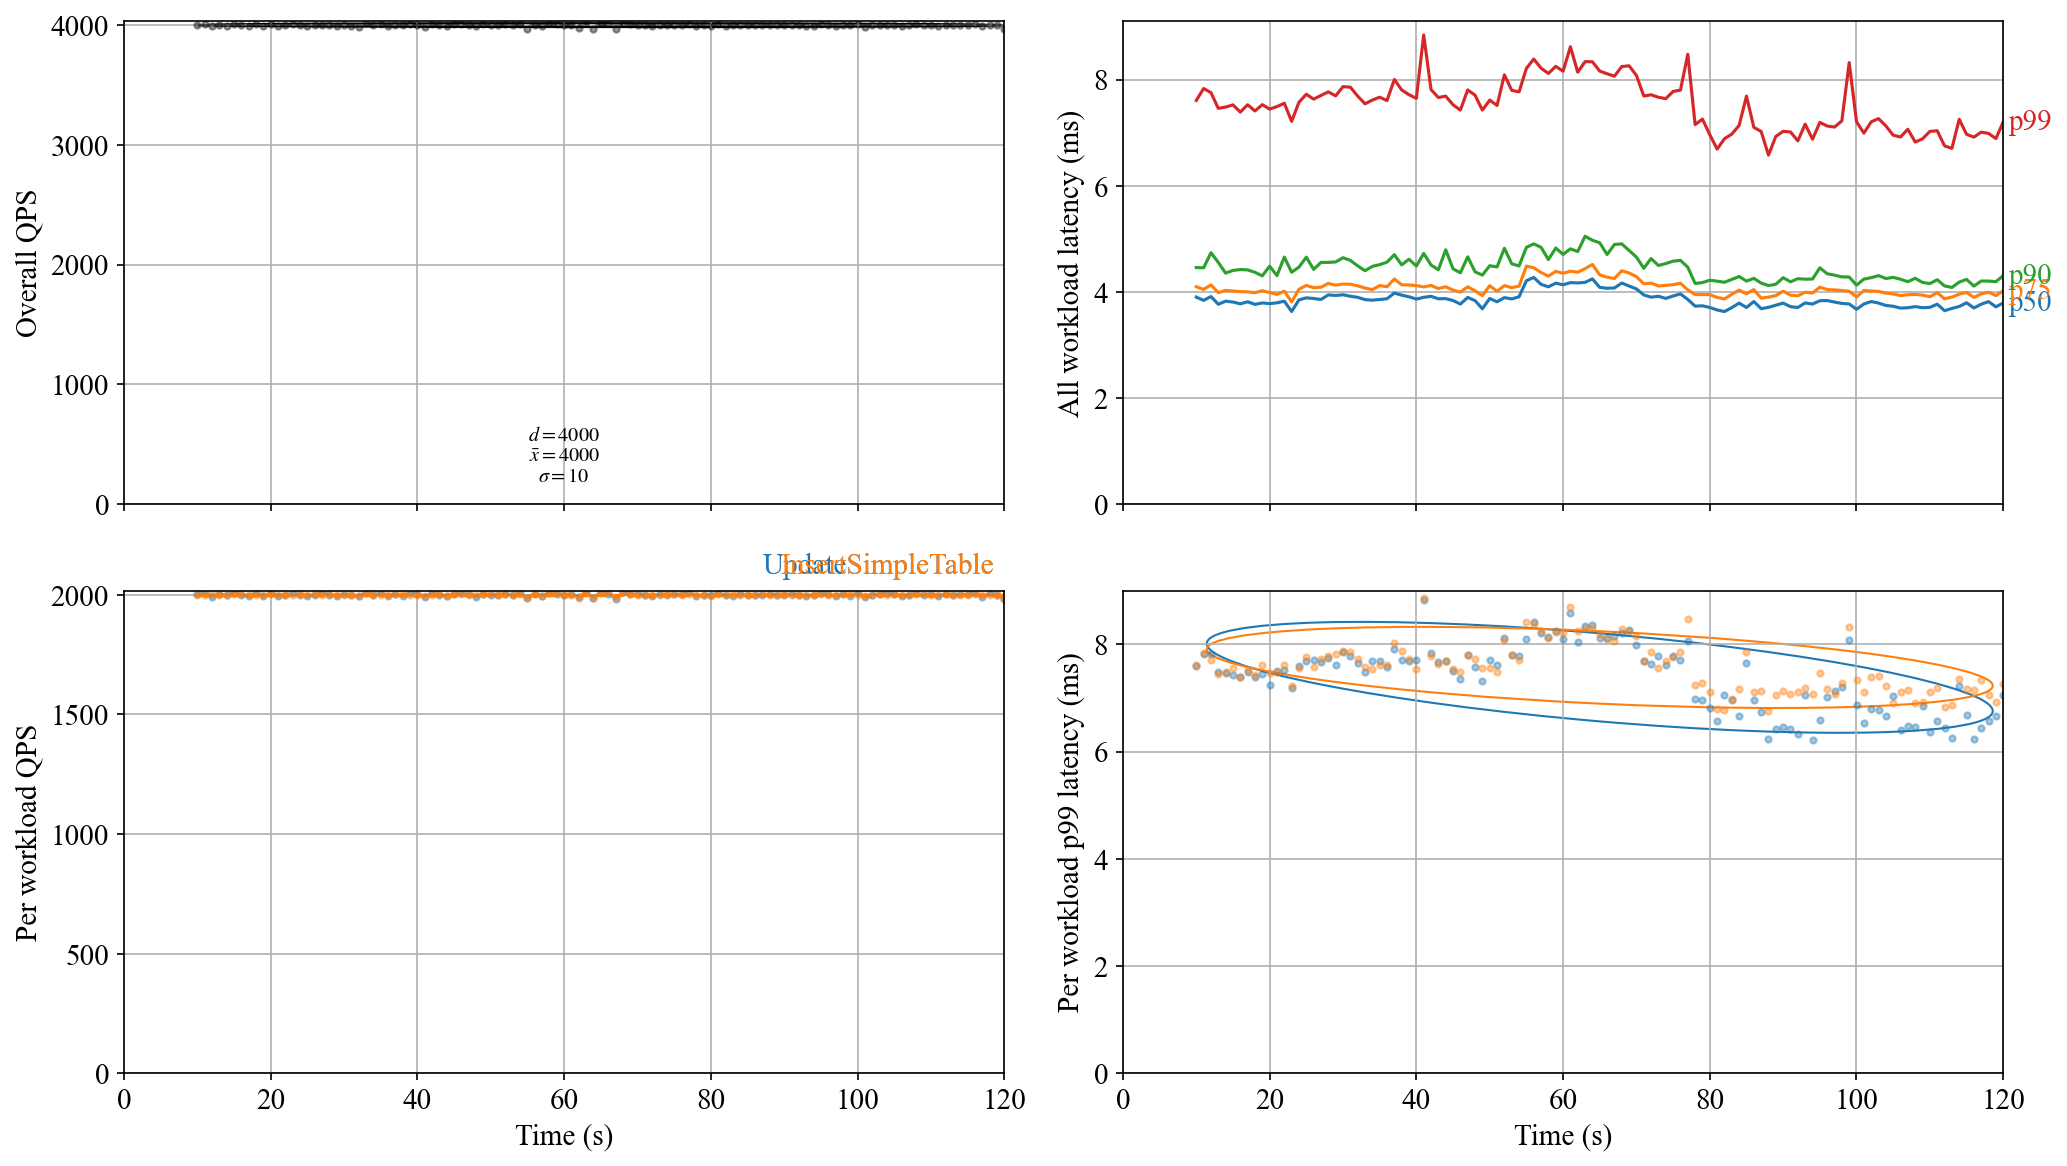

In [6]:
_ = runs_list[-1].standard_figure()